In [1]:
import pandas as pd 

df  = pd.read_excel(r"C:\Users\Paxerahealth\Downloads\test.xlsx")

from sklearn.preprocessing import LabelEncoder, StandardScaler
product_encoded = LabelEncoder()
product_encoded.fit(df['Product'])
df['Product'] = product_encoded.transform(df['Product'])

discount_band_encoded = LabelEncoder()
discount_band_encoded.fit(df['Discount Band'])
df['Discount Band'] = discount_band_encoded.transform(df['Discount Band'])

#  Normalize the data
scaler = StandardScaler()
df[['Product', 'Discount Band', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'COGS']] = scaler.fit_transform(df[['Product', 'Discount Band', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'COGS']])

df


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Germany,-1.045228,1.874616,1513.0,-0.861342,1.694287,1.364884,-0.573087,529550.00,1.216891,136170.00,2014-12-01,12,December,2014
1,Government,Germany,0.209763,1.874616,1006.0,-0.796841,1.694287,0.666484,-0.573087,352100.00,0.569826,90540.00,2014-06-01,6,June,2014
2,Government,Canada,0.209763,1.874616,1725.0,-0.796841,1.694287,1.656917,-0.573087,603750.00,1.487458,155250.00,2013-11-01,11,November,2013
3,Government,Germany,0.209763,1.874616,1513.0,-0.796841,1.694287,1.364884,-0.573087,529550.00,1.216891,136170.00,2014-12-01,12,December,2014
4,Government,Germany,1.464753,1.874616,1006.0,0.216751,1.694287,0.666484,-0.573087,352100.00,0.569826,90540.00,2014-06-01,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Midmarket,Canada,0.209763,-1.160614,1614.0,-0.796841,-0.756733,-0.624012,-0.414828,20578.50,-0.634868,4438.50,2014-04-01,4,April,2014
696,Midmarket,Canada,0.209763,-1.160614,2559.0,-0.796841,-0.756733,-0.568223,-0.322167,32627.25,-0.588481,7037.25,2014-08-01,8,August,2014
697,Enterprise,Germany,0.209763,-1.160614,1085.0,-0.796841,0.048080,-0.185510,0.313485,115281.25,-0.074981,-14918.75,2014-10-01,10,October,2014
698,Midmarket,Germany,0.209763,-1.160614,1175.0,-0.796841,-0.756733,-0.649929,-0.457874,14981.25,-0.656417,3231.25,2014-10-01,10,October,2014


In [2]:
import torch 
from torch import nn


In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:

data = df[['Product' , 'Discount Band','Manufacturing Price','Sale Price' ,  'Gross Sales',  'Discounts', 'COGS']].to_numpy().tolist()
target = df['Profit'].to_numpy().tolist()   


data_length = len(data)

data_train = torch.tensor(data[:int(data_length*0.8)], device=device , requires_grad=True)
data_test = torch.tensor(data[int(data_length*0.8):], device=device , requires_grad=True)
target_train = torch.tensor(target[:int(data_length*0.8)], device=device , requires_grad=True).unsqueeze(1)
target_test = torch.tensor(target[int(data_length*0.8):], device=device , requires_grad=True).unsqueeze(1)





In [5]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.weight = nn.Parameter(torch.randn(7,1), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1), requires_grad=True)

    def forward(self, x):
        return torch.matmul(x, self.weight) + self.bias

In [6]:
torch.manual_seed(42)
model = LinearRegression()
loss_fn = nn.MSELoss()
# // Adjust the learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [7]:
epoches = 10000000
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
epoches_list = []
tr_losses = []
test_losses = []

for epoch in range(epoches):
    model.train()
    optimizer.zero_grad()
    output = model(data_train)
    loss = loss_fn(output, target_train)
    loss.backward()
    optimizer.step()
    
    
    model.eval()
    predict_test = model(data_test)
    test_loss = loss_fn(predict_test, target_test)
    
    
    if epoch % 1000 == 0:
        epoches_list.append(epoch)
        tr_losses.append( loss.item())
        test_losses.append(test_loss.item())
        print(f'Epoch {epoch} - Train_loss {loss.item()} - test loss {test_loss.item()}')

Epoch 0 - Train_loss 2828229120.0 - test loss 625555648.0
Epoch 1000 - Train_loss 68828496.0 - test loss 95773904.0
Epoch 2000 - Train_loss 8806851.0 - test loss 12254570.0
Epoch 3000 - Train_loss 1126818.5 - test loss 1567975.0
Epoch 4000 - Train_loss 144184.34375 - test loss 200640.6875
Epoch 5000 - Train_loss 18465.78125 - test loss 25695.384765625
Epoch 6000 - Train_loss 2369.174072265625 - test loss 3297.21240234375
Epoch 7000 - Train_loss 304.23028564453125 - test loss 423.28656005859375
Epoch 8000 - Train_loss 39.42954635620117 - test loss 54.76101303100586
Epoch 9000 - Train_loss 4.9545698165893555 - test loss 6.9530415534973145
Epoch 10000 - Train_loss 0.5675973892211914 - test loss 0.8035590052604675
Epoch 11000 - Train_loss 0.43488815426826477 - test loss 0.6132781505584717
Epoch 12000 - Train_loss 0.4347723126411438 - test loss 0.6132725477218628
Epoch 13000 - Train_loss 0.43478119373321533 - test loss 0.6131641864776611
Epoch 14000 - Train_loss 0.4346874952316284 - test lo

KeyboardInterrupt: 

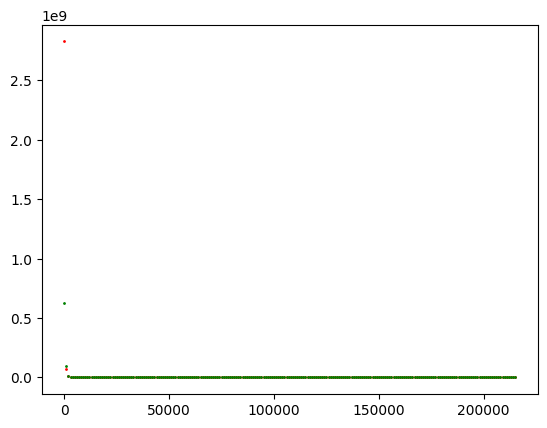

In [8]:
import matplotlib.pyplot as plt


data_test_numpy = data_test.cpu().detach().numpy()
target_test_numpy  = target_test.cpu().detach().numpy()
predict_test_numpy  = predict_test.cpu().detach().numpy()

# type(data_test)


# plt.scatter(data_test_numpy , predict_test_numpy , c = 'r' , label='Predicted')
# plt.scatter(data_test_numpy , target_test_numpy , c = 'b' , label='Actual')
# plt.scatter(target_test_numpy , predict_test_numpy , c = 'r', label='compare') 
plt.scatter(epoches_list , tr_losses , c = 'r' , s=1,  label='test_loss')
plt.scatter(epoches_list , test_losses , c = 'g' , s=1,  label='test_loss')




In [11]:
model.eval()
with torch.inference_mode():
    predict2 = model(data_test)

predict2.shape , data_test.shape

(torch.Size([140, 1]), torch.Size([140, 7]))

In [15]:
torch.save(model , 'model01.pth')

In [24]:
from pathlib import Path

model_path = Path('model02.pth')
model_path.mkdir(exist_ok=True, parents=True)
model_name = 'model0101.pth'
model_save = model_path / model_name
torch.save(model.state_dict(), model_save)


In [21]:
model.state_dict()


OrderedDict([('weight',
              tensor([[-7.2790e-03],
                      [-2.1166e-03],
                      [-2.9883e-02],
                      [ 1.5771e-01],
                      [ 2.5407e+05],
                      [-2.2947e+04],
                      [-2.0371e+05]])),
             ('bias', tensor([24133.9414]))])

In [29]:
model2 = LinearRegression()
model2.load_state_dict(torch.load(model_save))
# model2.eval()
model2.state_dict()

C:\Users\Paxerahealth\AppData\Local\Temp\ipykernel_19568\3383649782.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load(model_save))


OrderedDict([('weight',
              tensor([[-7.2790e-03],
                      [-2.1166e-03],
                      [-2.9883e-02],
                      [ 1.5771e-01],
                      [ 2.5407e+05],
                      [-2.2947e+04],
                      [-2.0371e+05]])),
             ('bias', tensor([24133.9414]))])

In [ ]:
predict = model2(data_test)